In [1]:
# impporting all the important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# reading the data into the python environment
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
# checking the first few rows of the data
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# MISSING VALUES

In [4]:
# checking for missing values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# OUTLIER HANDLING

In [5]:
# checking which column needs outlier management
data.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [6]:
# does not need outlier management
data.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

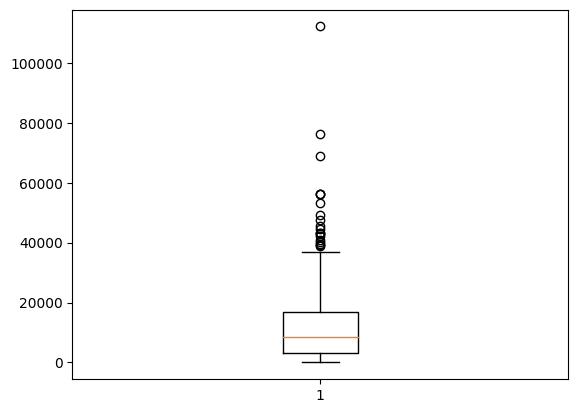

In [7]:
# fresh column needs outlier management
plt.boxplot(data['Fresh'])
plt.show()

In [8]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [9]:
# simply looking at the data one can figure out that below columns need outlier management

features = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

In [10]:
# creating a function which when called will do the outlier capping for all columns at once.
def iqr_capping(df,cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr

    df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [11]:
# calling the function which does the outlier management for all the columns with outliers
iqr_capping(data,features)

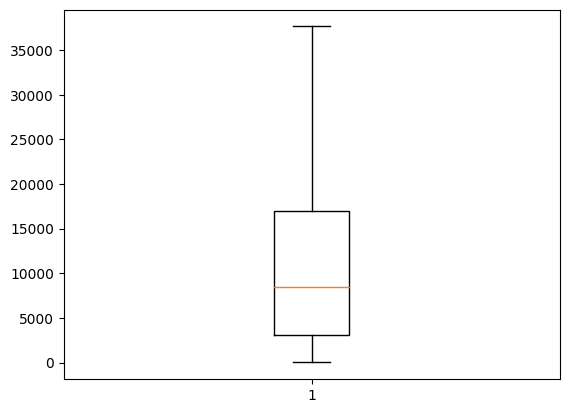

In [12]:
# cheking if capping of outliers was done in fresh column
plt.boxplot(data['Fresh'])
plt.show()

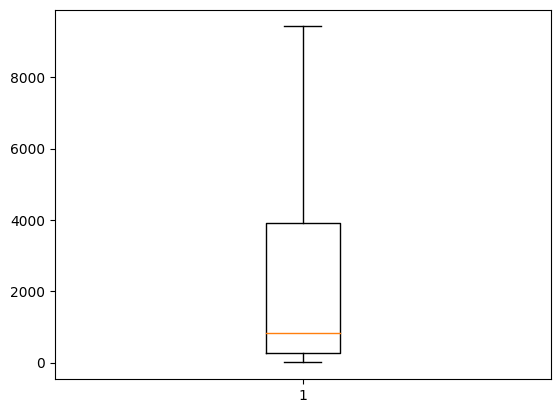

In [13]:
# checking for outliers in one more column randomly
plt.boxplot(data['Detergents_Paper'])
plt.show()

# Encoding

In [14]:
# cheking data type of columns. all columns are int or float so no need of encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


# Scaling

In [15]:
# cheking the column names
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [16]:
#taking the data into x
x = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [17]:
#cheking the first few rows of the data x
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


In [18]:
# importing the library for Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
#x.loc function is used so that x does not get converted to an array when doing the scaling and all elements of the dataframe are secured
x.loc[:,['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']] = sc.fit_transform(x[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

In [20]:
# cheking x again just to see if data frame is present and not converted into an array
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


# UnSupervised learning kmeans clustering

In [21]:
# importing the kmeans library
from sklearn.cluster import KMeans

In [22]:
# calculating the wcss value for differeent number of clusters and appending it in wcss variable
wcss= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)
  kmeans.fit(x)
  wcss1 = kmeans.inertia_
  wcss.append(wcss1)

In [23]:
wcss

[3520.000000000001,
 2313.1399727609323,
 1930.786317794646,
 1689.8369699372606,
 1495.5091738758324,
 1367.0241326287546,
 1266.238669010972,
 1195.1411507717035,
 1131.7811835040718,
 1074.756187412308]

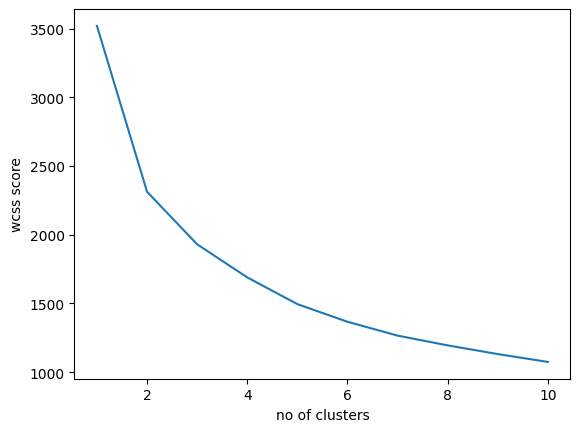

In [24]:
# plotting the graph to find the elbow and hence number of ideal clusters
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss score')
plt.show()


In [25]:
# finding kmeans clustering for 2 number of clusters
km = kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10)


In [26]:
#fitting the model with x
km.fit(x)

KMeans(n_clusters=2, n_init=10)

In [28]:
# finding which data point belongs to which cluster
cluster_lables_kmeans = km.predict(x)

In [29]:
# cheking which data point belongs to which cluster
cluster_lables_kmeans

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [31]:
# chekcing the silhouetter score for k means clustering. if value close to 1 then it has very well defined clusters
from sklearn.metrics import silhouette_score
silh_kmeans = silhouette_score(x,cluster_lables_kmeans)
print(silh_kmeans)


0.3503392454619006


#DBSCAN

In [30]:
# importing the library for DBSCAN
from sklearn.cluster import DBSCAN

In [38]:
# defining the dbscan function with important parameters
db = DBSCAN(eps=0.5, min_samples=5)

In [39]:
# predicting which data points belong to which clusters
lables_db = db.fit_predict(x)

In [40]:
# chekcing the score silhuetter for dbscan. its coming -0.11 means the model has to be remade. it didnt perform well
from sklearn.metrics import silhouette_score
silh_dbscan = silhouette_score(x,lables_db)
print(silh_dbscan)

-0.11582883442814175


# Agglomerative Clustering

In [41]:
# importing the libraries
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster.hierarchy import fcluster

mergings = linkage(x,method='ward')

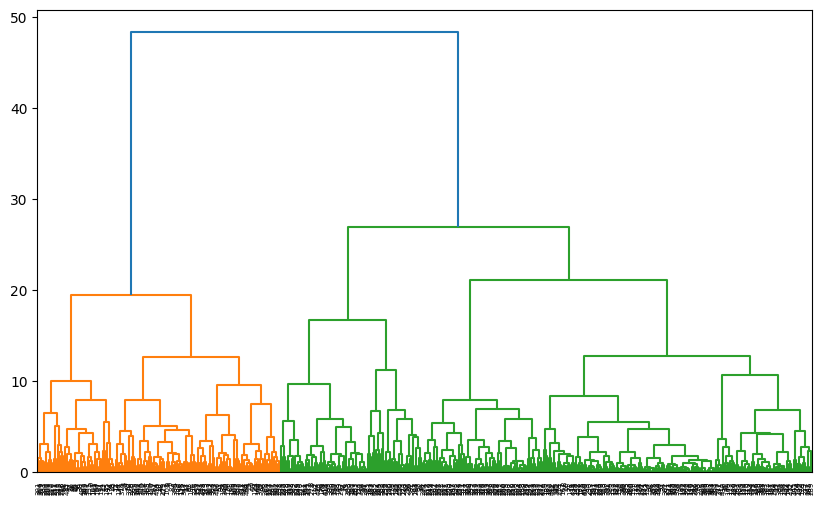

In [43]:
# making the plot for dendogram
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(340,color ='green', linestyle='--')
plt.show()


In [45]:
# importing the agglomerative library
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')


In [46]:
# predicting which cluster each data point goes into
cluster_hc = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [47]:
cluster_hc

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [48]:
# cheking the silhouette score for agglomerative clusterring
from sklearn.metrics import silhouette_score
silh_agglomerative = silhouette_score(x,cluster_hc)
print(silh_agglomerative)

0.34246611824997875


#PCA

In [49]:
# importing the library for PCA
from sklearn.decomposition import PCA

In [50]:
# defining the PCA to be done with 3 features
pc = PCA(n_components = 3)

In [51]:
# fitting the pca model
pc_array = pc.fit_transform(x)

In [52]:
pc_array.shape

(440, 3)

In [53]:
# converting the array into a dataframe
pc_data = pd.DataFrame(pc_array, index = data.index, columns = ['PC1', 'PC2', 'PC3'])

In [54]:
pc_data

,PC1,PC2,PC3
0,1.366764,-0.343797,-0.777218
1,1.687111,-0.061971,-0.586693
2,1.793681,1.079071,-0.550685
3,-1.427355,1.204432,-0.392013
4,0.842098,2.244694,-0.740407
...,...,...,...
435,0.369764,3.252086,-0.376745
436,-1.806466,2.396991,-0.866604
437,4.407257,0.318859,-0.589356
438,-1.168532,-0.029422,-0.678715
